In [1]:
from IPython.display import Image,display
from IPython.core.display import HTML 
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
%%html
<img src="1200px-Jupyter_logo.svg.png",height=400, width=400 >

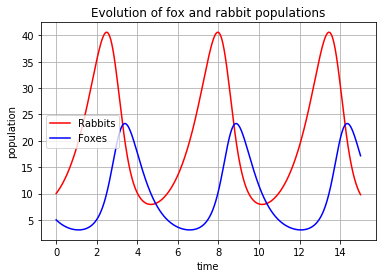

In [3]:
#!python
# from: https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
from numpy import *
#import pylab as p
import matplotlib.pyplot as p
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
#@interact(beta=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.4),gamma=widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.2))

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])
#!python
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True
#!python
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])
#! python
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])
#!python
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199
#!python
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'
#!python
rabbits, foxes = X.T
#f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
p.show()
#f1.savefig('rabbits_and_foxes_1.png')


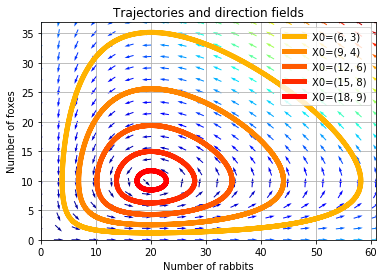

In [6]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

#f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    #p.plot( X[:,0], X[:,1], lw=5.0*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    p.plot( X[:,0], X[:,1], lw=5.0, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
#Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
#f2.savefig('rabbits_and_foxes_2.png')
p.show()


NameError: name 'x1' is not defined

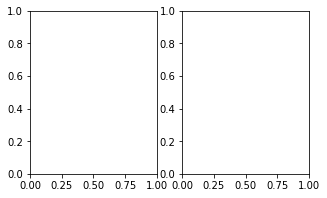

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
fig.tight_layout()

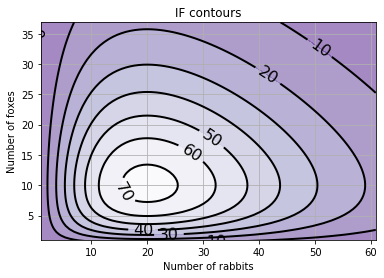

In [5]:
#!python
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    #print("X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G",X0[0], X0[1], I_mean, delta)
# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %

#!python
#-------------------------------------------------------
# plot iso contours
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
f3.savefig('rabbits_and_foxes_3.png')
p.show()

In [12]:
from IPython.display import clear_output
def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Correct!" + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "No! Please try again!" + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])
    

In [7]:
Q1 = create_multipleChoice_widget('What kind of figure is figure b?',['A phase portrait','A Poincare map','A time series plot'],'A phase portrait')
Q2 = create_multipleChoice_widget('What happens if more foxes are introduced?',['Rabbits and foxes go extinct','Occasional rabbit plagues','The foxes all die'],'Occasional rabbit plagues')
#Q2 = create_multipleChoice_widget('What happens if more foxes are introduced?',['Rabbits and foxes go extinct','Rabbit plagues ','Foxes will die'],'Rabbit plagues')
Q3 = create_multipleChoice_widget('What type of point is the origin?',['A limit cycle','A saddle point','An equilibrium point'],'A saddle point')

In [8]:
display(Q1)
display(Q2)
display(Q3)


<html>
<body>    

<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Jupyter labs in the classroom
        </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
        <ul>
            <li> written in python, with easy online notebooks</li>
            <li>Online lecture notes and slides</li>
            <li>interactive data manipulation and visualization</li>
            <li>tools for data analysis, programming, GUI creation, etc...</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


<html>
<body>    
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Nonlinear dynamics and control: systems of first order ODEs
                   </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
        Background:
        <ul>
            <li>Ordinary differential equations $\alpha$</li>
            <li>Numerical methods</li>
            <li>Transport Phenomena</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


In [8]:
HTML("""
<style>
body {
  counter-reset: section;                       /* Set a counter named 'section', and its initial value is 0. */
}
.container {
  position: relative;
  text-align: center;
  color: white;
}

.bottom-left {
  position: absolute;
  bottom: 8px;
  left: 16px;
}

.top-left {
  position: absolute;
  top: 8px;
  left: 16px;
}

.top-right {
  position: absolute;
  top: 8px;
  right: 16px;
}

.bottom-right {
  position: absolute;
  bottom: 8px;
  right: 16px;
}

.centered {
  position: absolute;
  top: 50%;
  left: 50%;
  transform: translate(-50%, -50%);
}



h3::before {
  counter-increment: section;                   /* Increment the value of section counter by 1 */
  content: "Section " counter(section) ": ";    /* Display the word 'Section ', the value of 
                                                   section counter, and a colon before the content
                                                   of each h3 */
}
</style>
    """)


<html>
<body>    

<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
          SIR model of a virus outbreak
        </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            The outbreak and spread of a contagious disease can be modeled by the SIR model:
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>
</html>    



<html>
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 
<!--
    <img src="coronavirus_cropped.jpg" border=3 style="width:99.6%;margin:0px 0px"> 
    </img>
-->
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>
</html>    


In [10]:
%%html
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 
<!--
    <img src="coronavirus_cropped.jpg" border=3 style="width:99.6%;margin:0px 0px"> 
    </img>
-->
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            
            
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>   



<!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? --> SIR model of a virus outbreak,"Classic SIR model: Kermack-McKendrick: $\frac{dS}{dt}=-\beta S I$ $\frac{dI}{dt}=\beta S I - \gamma I $ $\frac{dR}{dt}=\gamma I$ $S(t)$ : number of Susceptible persons (persons that are not infected or immune) $I(t)$ : number of Infected persons $R(t)$ : number of Recovered persons (immune) $N = S+I+R$ : total population $\beta$ : infection rate $\alpha$ : recovery rate In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead."


In [27]:
%%html
<body> 
 <div class="container">
  <img src="coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       SIR model of a virus outbreak
              </font> 
     </div>
</div> 
<!--
    <img src="coronavirus_cropped.jpg" border=3 style="width:99.6%;margin:0px 0px"> 
    </img>
-->
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
            <!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? -->
            
            
            SIR model of a virus outbreak  <br>
        </font> 
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            Classic SIR model: 
            Kermack-McKendrick:<br>
                $\frac{dS}{dt}=-\beta S I$<br>
                $\frac{dI}{dt}=\beta S I - \gamma I $<br>
                $\frac{dR}{dt}=\gamma I$ <br>    
            <ul>
            <li>  $S(t)$ : number of Susceptible persons (persons that are not infected or immune) </li>
            <li>  $I(t)$ : number of Infected persons </li>
            <li>  $R(t)$ : number of Recovered persons (immune) </li>
            <li>  $N = S+I+R$ : total population </li>
            <li>  $\beta$ : infection rate </li>
            <li>  $\alpha$ : recovery rate </li>
            </ul>
            In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead.
            </font>    
    </td>
</tr>
</table>
</body>   

<!-- here an interactive image of the world with real-time infected cases??? choropleth map of the globe that can rotate and is colored with real-time data? --> SIR model of a virus outbreak,"Classic SIR model: Kermack-McKendrick: $\frac{dS}{dt}=-\beta S I$ $\frac{dI}{dt}=\beta S I - \gamma I $ $\frac{dR}{dt}=\gamma I$ $S(t)$ : number of Susceptible persons (persons that are not infected or immune) $I(t)$ : number of Infected persons $R(t)$ : number of Recovered persons (immune) $N = S+I+R$ : total population $\beta$ : infection rate $\alpha$ : recovery rate In this model, the total population size remains constant: nobody dies. Note that R can be also interpreted as the number of persons that are not ill anymore, either alive or dead."


In [25]:
#%matplotlib inline

import matplotlib.pyplot as plt
from ipywidgets import interact

import ipywidgets as widgets

import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
#import matplotlib.pyplot as plt
from datetime import timedelta, datetime
# for nan
#import math

#S_0 = 15000
#population size
N = 1000000
I_0 = 10
R_0 = 0
S_0 = N - I_0 - R_0

# nr of points
size=72


# beta = transmission rate [number per day]
beta = 0.4

# gamma = 1/infectuous period = 1/T, T=5 days
gamma = 0.2

#R = beta/gamma


#def f(x):
#    return x
#        
##interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));
#interact(f, x=widgets.FloatSlider(min=0.4,max=0.6,step=0.01,value=0.5))

# @ means its a decorator, functions are called implicitly
@interact(beta=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.4),gamma=widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.2))
def sirsol(beta,gamma):

    
    def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/N, beta*S*I/N - gamma*I,gamma*I]

    
    #beta=n
    SIR_sol = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 0.5))

    #index = confirmed.index
    #print("index = ",index)
    #print 
    #x=np.arange(len(new_index))
        
    fig = plt.figure()
    ax = plt.subplot(111)
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.rcParams["axes.linewidth"] = 2.0
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['lines.markeredgecolor'] = 'black'

    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12

        
    plt.xticks([0,7,14,21,28,35,42,49,56,63,70],['start outbreak','week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10'],rotation=45)
       

    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Susceptible S')
    #plt.plot(prediction.y[1],label='predicted exposed E')
    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Infected I')
    plt.plot(SIR_sol.t,0.96*SIR_sol.y[2],label='Recovered R')
    plt.plot(SIR_sol.t,0.04*SIR_sol.y[2],label='Deaths D')
    ax.legend(loc='upper left', frameon=False)

    plt.show()
    
    
    


interactive(children=(FloatSlider(value=0.4, description='beta', max=2.0, min=0.1), FloatSlider(value=0.2, des…

In [38]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
from datetime import timedelta, datetime

F_0 = 5
R_0 = 5

# nr of points
size=16

#a = 0.4
#b = 0.2
#c=1
#d=1

# @ means its a decorator, functions are called implicitly
@interact(a=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.0),
          b=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.1),
          c=widgets.FloatSlider(min=0.1, max=2, step=0.05, value=1.5),
          d=widgets.FloatSlider(min=0.1, max=1, step=0.05, value=0.75))
def sirsol(a,b,c,d):
    def lotka_volterra(t, y):
            F = y[0]
            R = y[1]
            return [a*F - b*F*R, -c*R + d*b*F*R]

    
    #beta=n
    SIR_sol = solve_ivp(lotka_volterra, [0, size], [F_0,R_0], t_eval=np.arange(0, size, 0.1))

      
    fig = plt.figure()
    ax = plt.subplot(111)
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.rcParams["axes.linewidth"] = 2.0
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['lines.markeredgecolor'] = 'black'

    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12
    
    plt.xlabel('time [weeks]')
    plt.ylabel('population')
    plt.grid(True)
#    plt.xticks([0,7,14,21,28,35,42,49,56,63,70],['start outbreak','week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10'],rotation=45)
       

    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Foxes')
    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Rabbits')
    
    ax.legend(loc='upper left', frameon=False)

    plt.show()
    

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1, step=0.05), FloatSlider(value=…

next slide: comparing with data: pulldown list of all country data data. We find that a fit might be difficult

next slide: fit of coefficients, realization that coefficients are changing in time. Fits take time to compute... do we want this realtime?

next slide: 